In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as py
from numpy import exp
import warnings
from sklearn.preprocessing import StandardScaler


There are the major variables we will be using

In [2]:
data='diabetes2.csv'
data=pd.read_csv(data)
data_train = data.sample(frac=0.8)
data_test=data.drop(data_train.index)
data_train=data_train.to_numpy()
data_test=data_test.to_numpy()
(m,n)=data_train.shape
X=data_train[:,0:(n-1)]
y=data_train[:,n-1].reshape(614,1)
x=np.concatenate((np.ones((m,1)),X), axis= 1)

In [11]:
def sigmoid(x):
    x=np.array(x, dtype=np.float64)
    #warnings.filterwarnings("ignore")
    return(1/(1+np.exp(-x)))


In [1]:
# for cost( loss) and its derivative
def costfunction(theta,x,y,lam):
    (m,n)=x.shape
    J=0
    (b1,b)=theta.shape
    grad = np.zeros((b1,b))
    #print(x,b,grad.size,x.size,y.size)
    a=(-1/m)*(np.dot((np.log(sigmoid(np.dot(x,theta)))).T,y)+np.dot((np.log(1-sigmoid(np.dot(x,theta)))).T,(1-y)))
    reg=(lam/(2*m))*np.sum(np.square(theta[1:b1]))
    J=a+reg
    theta2=np.concatenate((np.zeros((1,1)),theta[1:b1]), axis=0)
    grad=(1/m)*np.dot(x.T,(sigmoid(np.dot(x,theta))-y))+(lam/m)*(theta2)

    return(np.array([J,grad]))


In [13]:
# for running iterations in gradient descent
def caltheta(theta,x,y,lam,itr,alpha):
    J=[]
    for i in range(0,itr):
        [jj,grad]=costfunction(theta,x,y,lam)
        jj=np.asscalar(jj)
        J.append(jj)
        theta=theta-alpha*grad
        warnings.filterwarnings("ignore")
    return(np.array([J,theta]))

In [14]:
#To get best alpha ( step size in gradient descent) and lam (lambda = the regularisation parameter)
itr=1000
ans=[]
for i in range(0,14,1):
    for j in range(0,14,1):
        theta=np.zeros((n,1))
        lam=(2**(i))/10000
        alpha=(2**(j))/10000
        J=[]
        [J,theta]=caltheta(theta,x,y,lam,itr,alpha)
        q=sigmoid(np.dot(x,theta))
        thresh=0.5
        for i1 in range(0,614,1):
            if q[i1]>=thresh:
                q[i1]=1
            else:
                q[i1]=0
        t=0
        for i1 in range(0,614,1):
            if not q[i1]==y[i1]:
                t+=1
        ans.append(100*t/614)
    

<ipython-input-12-177ceff9fe9d>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return(np.array([J,grad]))
<ipython-input-13-c77ee60838e4>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  jj=np.asscalar(jj)


In [15]:
# to get the accuracy we achieve at every step
best=ans.index(max(ans))
alpha=(2**(best%14))/10000
lam=(2**(best//14))/10000
itr=1001
J=[]
acc=[]
theta=np.zeros((n,1))
for i in range(1,1001,1):
    [J,theta]=caltheta(theta,x,y,lam,1,alpha)
    q=sigmoid(np.dot(x,theta))
    thresh=0.5
    for i1 in range(0,614,1):
        if q[i1]>=thresh:
            q[i1]=1
        else:
            q[i1]=0
    t=0
    for i1 in range(0,614,1):
        if not q[i1]==y[i1]:
            t+=1
    acc.append(100*t/614)

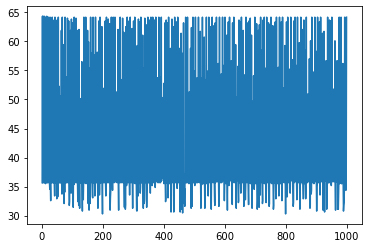

In [20]:
# plotting accuarcy we got at every iteration ( here total 1000)
# note that it is not uniform ...but we have choosen alpha and lambda such that its max at itr=1000
x_axis=np.arange(1,1001).reshape(1000)
plt.plot(x_axis,acc)

In [21]:
print("the final accuracy we achieved in training= ",acc[999])


the final accuracy we achieved in training=  64.16938110749186


In [22]:
# test data accuracy
(m1,n1)=data_test.shape
X1=data_test[:,0:(n1-1)]
y1=data_test[:,n1-1].reshape(154,1)
x1=np.concatenate((np.ones((m1,1)),X1), axis= 1)
q=sigmoid(np.dot(x1,theta))
thresh=0.5
for i in range(0,154,1):
    if q[i]>=thresh:
        q[i]=1
    else:
        q[i]=0
t=0
for i in range(0,154,1):
    if not q[i]==y1[i]:
        t+=1
print("accuracy we acieved in test data = ",100*t/154)


accuracy we acieved in test data =  68.18181818181819
